![udesa](imgs/udesa_marca.png)
<h1><center> <font size="14">Contraste de Hipótesis. <br> Estadístico T-Student. </font></center></h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Estadístico T-Student.

El estadístico *t-Student* permite compara la media muestral $\bar {x}$ con una media poblacional, $\mu$ supuesta conocida, en el caso donde no se conoce la varianza $\sigma^2$, y se la estima a partir del estimador $s^2$.

Se considera que la muestra $X = \{x_1, x_2, ...., x_n \}$ está formada por $n$ variables aleatorias gaussianas independientes e idénticamente distribuidas. **Y por lo tanto se asume que poseen igual media y varianza**. Se define la media muestral $ \bar {x}$:

$$ \bar {x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

y el estimador de la varianza muestral está dado por:

$$ s^{2} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

queda definido el estadístico como

$$t =  \frac {\sqrt{n-1}}{n} \frac {\sum_{i=1}^{n} x_i -\mu }{\sqrt {\sum_{i=1}^{n} x_i^2}} = {\frac {{\bar {x}}-\mu }{\sqrt {s^{2}/n}}}$$.


La **función densidad de probabilidad t-student** para $\nu = n-1$ grados de libertad, está dada por:

$$f(t)={\frac {\Gamma ({\frac {\nu +1}{2}})}{{\sqrt {\nu \pi }}\,\Gamma ({\frac {\nu }{2}})}}\left(1+{\frac {t^{2}}{\nu }}\right)^{-(\nu +1)/2}$$


![](imgs/Student_t.png)
https://en.wikipedia.org/wiki/Student%27s_t-distribution#/media/File:Student_t_pdf.svg

Se debe confirmar entonces:


1. **Independencia**. Depende fuertemente del experimento (Pearson).
2. **Normalidad**. Las v.a. en el t-test requieren ser normales. (Kolmogorov-Smirnov, Shapiro-Wilks, Lilliefors)
3. **Homocedasticidad**. La varianza debe conservarse (Estadístico F - Test de Barlet - Test de Levene).


# Muestras. 

Se conoce que la **media de consumo de determinado alimento es de 35Kg por año**. ($\mu = 35$). Por otra parte, una asociación de comerciantes, poseen dos puntos de ventas en los que se generaron dos muestras del consumo de sus clientes:

In [ ]:
# MEDIA POBLACIONAL
mu = 35


# Comercio 1

data_comer1 = np.asarray(pd.read_csv('data/data_comer1.csv')['Consumo'])
print(f'Comercio 1\nCantidad de datos: {len(data_comer1)}\nConsumo medio:{np.mean(data_comer1)}\n')

# Comercio 2

data_comer2 = np.asarray(pd.read_csv('data/data_comer2.csv')['Consumo'])
print(f'Comercio 2\nCantidad de datos: {len(data_comer2)}\nConsumo medio:{np.mean(data_comer2)}\n')

print('')

f, ax = plt.subplots(1,2, figsize=(10,4))
h = ax[0].hist(data_comer1,bins=20,density=True,color='#599AD3')
ax[0].set_title('Comercio 1')
h = ax[1].hist(data_comer2,bins=20,density=True,color='#599AD3')
ax[1].set_title('Comercio 2')
print('')

In [ ]:
data_comer1


# t-Test a Realizar

## Test de una muestra (One-Sample t-Test).  

<div class="alert alert-block alert-info">
    
Un **t-test de una muestra** busca comparar la **media de una muestra** con una media poblacional, o una media supuesta conocida, o algún parámetro supuesto con el que se quiera contrastar a la **media muestal**. 


</div> 

Se define el estadístico:

$$t={\frac {{\bar {x}}-\mu }{\sqrt {s^{2}/n}}}$$.

y la validación respecto al dato poblacional, se realiza mediante un Test de Hipótesis, donde se define $\mathcal{H}_0 : \mu = 35.76$ la media muestral no es diferente a la poblacional.

 
$$\begin{array}\\
\boldsymbol{ Aceptar \, \mathcal{H}_0 }& si & |t| > \alpha \\
\boldsymbol{ Rechazar \, \mathcal{H}_0 } & si & |t| < \alpha
\end{array}
$$

donde $\alpha \in \mathcal{R}$ es el umbral de decisión, y $p = P(|t| > \alpha)$ indica la confianza en el el rechazo de la la hipótesis $\mathcal{H}_0$, es decir, es el error que se comete al rechazar $\mathcal{H}_0$ cuando en realidad se cumple.


# Test de Independencia.

La independencia está fuertemente ligada a la realización del experimento. Se asume que las muestras son independientes, y se mediante la correlación se pueden generar test para determinar la existencia de correlación

## Test de Correlación
La correlación de Pearson y de Spearman $H_0$: las variables aleatorias **no están correlacionadas**. Por lo tanto, el aceptarlas no pueden generar un conclusión sobre la independencia entre estas.

* **Correlación de Pearson**: permite determinar dependencias lineales de variables aleatorias gaussianas. $H_0$: las distribuciones no están correlacionadas y tienen distribución normal: $${\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}$$


* **Coeficientes de Correlación de rangos de Spearman**. Igual que Pearson, pero no está limitado a normales. Siendo $R$ la función rango: $${\displaystyle r_{s}=\rho _{\operatorname {R} (X),\operatorname {R} (Y)}={\frac {\operatorname {cov} (\operatorname {R} (X),\operatorname {R} (Y))}{\sigma _{\operatorname {R} (X)}\sigma _{\operatorname {R} (Y)}}},}$$

## Test $\chi^2$ de Pearson para independencia. 

<div class="alert alert-block alert-info">
    
El Test  $\chi^2$ de Pearson es un test no paramétrico que se puede emplear para diferentes pruebas de bondad de ajuste. La prueba de independencia es considerar el ajuste de una distribución de probabilidad objetivo, proveniente de las muestras experimentales, con la distribución teórica de las muestras consideradas independientes.
    
</div> 

El test permite determinar si dos variables aleatorias $X_1$ y $X_2$ son independientes. Esa es justamente su hipótesis nula. $H_0$: **las variables aleatorias no están relacionadas (son independientes).**

El test propone comparar dos distribuciones conjuntas:

* $P_{O_1,O_2}(o_1,o_2)$, una distribución representativa de $P_{X_1,X_2}(x_1,x_2)$, donde $[O_1,O_2] = g([X_1, X_2])$, con $g(\cdot)$ una transformación requerida y que no implique la pérdida de independencia 
    - g: una cuantización apropiada del dominio de $[X_1, X_2]$
* <font size="5">e</font>$_{O_1,O_2}(o_1,o_2) = f_{O_1}(O_1)~f_{O_2}(O_2)$ la distribución esperada si se cumple la hipótesis nula: $O_1$ y $O_2$ independientes.

Para estimar estas distribuciones de probabilidades se emplea una **matriz de contingencia**, midiendo  la frecuencia de ocurrencia de tuplas $O_{ij}=\#(o_1^i, o_2^j)= (cantidad\,de\,veces\,que\,ocurre\, o_1^i \, y\, o_2^j)$, con $o_1^i \in O_1$ y $o_2^j \in O_2$.




| |$o_2^1$|$o_2^2$| $\cdots$ |$o_2^j$|$\cdots$|$o_2^c$|$f^\#_{O_1^i}(o_1^i)$|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$o_1^1$| $O_{1,1}=\#(o_1^1, o_2^1)$ | $O_{1,2}=\#(o_1^1, o_2^2)$| $\cdots$| | | |$\sum_j O_{1,j}$ |
|$o_1^2$| $O_{2,1}=\#(o_1^2, o_2^1)$|  $O_{2,2}=\#(o_1^2, o_2^2)$| $\cdots$| | | |$\sum_j O_{2,j}$ |
|$\vdots$| | | $\ddots$| | | | $\vdots$|
|$o_1^i$| | |$\cdots$|$O_{i,j} = \#(o_1^i, o_2^j)$ |$\cdots$| |$\sum_j O_{i,j}$|
|$\vdots$| | | | |$\ddots$ | | $\vdots$|
|$o_1^r$| | | | | | |$\sum_j O_{r,j}$ |
|$f^\#_{O_2^j}(o_2^j)$| $\sum_i O_{i,1}$| $\sum_i O_{i,2}$|$\cdots$| $\sum_i O_{i,j}$|$\cdots$|$ \sum_{i} O_{i,c}$ |$n = \sum_{i,j} O_{i,j}$ |


donde las distribuciones marginales se definen como

$$ f_{O_1^i} = \frac{1}{n} f^\#_{O_1^i} ~ y ~ f_{O_2^j} = \frac{1}{n} f^\#_{O_2^j}$$

El estadístico se define por la comparación entre las entre dos distribuciones, $P_{O_1,O_2}(o_1,o_2)$  y <font size="5">e</font>$_{O_1,O_2}(o_1,o_2)$:

$$ \chi ^{2}=\sum _{i=1}^{r}\sum _{j=1}^{c}{\frac {(o_{i,j}-e_{i,j})^{2}}{e_{i,j}}}$$

Siendo el estadístico una $\chi^2$ con $\rho = (r-1)(c-1)$ grados de libertad, donde $r$ es la cantidad de filas, $c$ es la cantidad de columnas de la matriz de contingencia; $o_{i,j}$ es la frecuencia o conteo de observaciones para una i,j-contingencia, y $e_{i,j}$ es la frecuencia teórica esperada , si se cumple la hipótesis nula, para dicha i,j-contingencia, por lo tanto queda definido como,

$$ e_{ij} = \sum_{i=1}^r O_{i,j} \sum_{j=1}^c O_{i,j} $$

### Prueba de Independencia para muestras reales.

Entre dos muestras reales existen infinitos reales, por lo tanto, no se puede medir la frecuencia de ocurrencia entre muestras reales, puesto el ruido de medición hace que se encuentre, en general, una única vez una dupla $(x_1,x_2)$. Para ello se debe transformar el dominio mediante un proceso de **cuantización** de las variables aleatorias. Este proceso de cuantización es la transformación $g(\cdot)$ a la que se hizo referencia anteriormente. La siguiente función permite cuantizar el domino representado por las muestras adquiridas:

In [ ]:
def cuantizacion( data, steps = 20):
    """
    Cuantización del vector <data> en <steps> niveles.
    """
    if steps < 2:
        steps = 2
    bins = np.arange(0.0,1.0+(1/steps), 1/steps)
    bins = (np.max(data)-np.min(data))*bins + np.min(data) #determina los límites de cada bin-
    bins = bins[1:-1]
    return np.digitize(data,bins)


In [ ]:
x = np.random.rand(20)
y = np.random.rand(20) + x
norm_x = cuantizacion(x, steps=4)
norm_y = cuantizacion(y, steps=4)
print(f'x: \n {x}')
print(f'norm_x: \n {norm_x}')
print(f'y: \n {y}')
print(f'norm_y: \n {norm_y}')

In [ ]:
table = stats.contingency.crosstab(norm_x,norm_y)
st = stats.chi2_contingency(table[1])
print(f'p:{st[1]}')
print(f'rango_x: {table[0][0]}')
print(f'rango_y: {table[0][1]}')
print(f'frecuencias:\n {table[1]}')
if st[1] > 0.05:
    print(f'Se acepta H0(independencia). st: {st[0]}, p: {st[1]}')
else:
    print(f'Se rechaza H0, st: {st[0]}, p: {st[1]}')
print('\n')

##### Seguimos con el práctico.
Se cuantizan las muestras de `data_comer1` y `data_comer2`, y se analiza independencia.

In [ ]:
# Independencia intra muestras Comercio 1

print('Comercio 1:')

cuant_comer1 = cuantizacion(data_comer1,10) # cuantización
choice1 = cuant_comer1[:int(len(cuant_comer1)/2)]
choice2 = cuant_comer1[int(len(cuant_comer1)/2):]
table = stats.contingency.crosstab(choice1,choice2)
st = stats.chi2_contingency(table[1])
if st[1] > 0.05:
    print(f'Se acepta H0(independencia). st: {st[0]}, p: {st[1]}')
else:
    print(f'Se rechaza H0, st: {st[0]}, p: {st[1]}')
print('\n')

En más detalles, cómo evalúa el test a las series muestrales:

In [ ]:
print('')
print(f'Submuestras choice1:\n{choice1}\n')

print(f'Submuestras choice2:\n{choice2}\n')

print(f'p:{st[1]}')
print(f'rango_choice1: {table[0][0]}')
print(f'rango_choice2: {table[0][1]}')
print(f'frecuencias:\n {table[1]}')

In [ ]:
# Independencia intra muestras Comercio 2

print('Comercio 2:')
cuant_comer2 = cuantizacion(data_comer2,10)

choice1 = cuant_comer2[:int(len(cuant_comer2)/2)]
choice2 = cuant_comer2[int(len(cuant_comer2)/2):]
table = stats.contingency.crosstab(choice1,choice2)
st = stats.chi2_contingency(table[1])
if st[1] > 0.05:
    print(f'Se acepta H0(independencia). st: {st[0]}, p: {st[1]}')
else:
    print(f'Se rechaza H0, st: {st[0]}, p: {st[1]}')
print('\n')


In [ ]:
print('')
print(f'Submuestras choice1:\n{choice1}\n')
print(f'Submuestras choice2:\n{choice2}\n')

print(f'p:{st[1]}')
print(f'rango_choice1: {table[0][0]}')
print(f'rango_choice2: {table[0][1]}')
print(f'frecuencias:\n {table[1]}')

In [ ]:
# Independencia muestras Comercio 1, Comercio 2

print('Independencia Comercio1 - Comercio2')
choice = cuant_comer2[0:len(data_comer1)] # selección de elementos de data_comer2
table = stats.contingency.crosstab(cuant_comer1,choice)
st = stats.chi2_contingency(table[1])
if st[1] > 0.05:
    print(f'Se acepta H0(independencia). st: {st[0]}, p: {st[1]}')
else:
    print(f'Se rechaza H0, st: {st[0]}, p: {st[1]}')

In [ ]:
print('')
print(f'Submuestras choice1:\n{choice1}\n')
print(f'Submuestras choice2:\n{choice2}\n')

print(f'p:{st[1]}')
print(f'rango_choice1: {table[0][0]}')
print(f'rango_choice2: {table[0][1]}')
print(f'frecuencias:\n {table[1]}')

En ningún caso se rechazar $H_0$, por lo tanto se asume independencia. 

# Test de Normalidad.
## Test de Kolmogorov-Smirnov.

$$ F_{n}(x)={\frac {{\text{cantidad de (elementos en la muestra}}\leq x)}{n}}$$

Estadístico: 

$$D_{n}=\sup _{x}|F_{n}(x)-F(x)|$$

Distribución de Probabilidad de Smirnov:

$$Pr (K\leq x)=1-2\sum _{k=1}^{\infty }(-1)^{k-1}e^{-2k^{2}x^{2}}={\frac {\sqrt {2\pi }}{x}}\sum _{k=1}^{\infty }e^{-(2k-1)^{2}\pi ^{2}/(8x^{2})}$$

$K=\sup _{t\in [0,1]}|B(t)|$, donde $B(t)$ es un proceso de tipo Puente Browniano.

### Ejemplo. 

Se generan 1000 muestras de una v.a. N(0,1) **(entonces no se necesita normalizar)** y 1000 muestras de una v.a. Unif(0,1), se va a testear la normalidad.

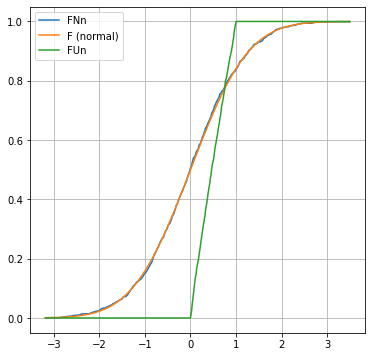

In [3]:


n_samples = 1000 
muestras_normales = np.random.randn(n_samples)
muestras_uniformes = np.random.uniform(size=n_samples)

min_norm = np.min(muestras_normales)
max_norm = np.max(muestras_normales)

# Estimación CDF normal
FNn = []
for i in np.arange(min_norm, max_norm, 0.01):
    FNn.append(sum(muestras_normales<i)/n_samples)
    
# Estimación CDF uniforme
FUn = []
for i in np.arange(min_norm, max_norm, 0.01):
    FUn.append(sum(muestras_uniformes<i)/n_samples)

# Función Distribución Acumulada normal (teórica)
x = np.arange(min_norm, max_norm, 0.01)
F = stats.norm.cdf(x)


#Gráfico
plt.figure(figsize=(6,6))
plt.plot(x,FNn, label='FNn')
plt.plot(x,F, label='F (normal)')
plt.plot(x,FUn, label='FUn')
plt.legend()
plt.grid()

Recordando, el estadístico que se emplea en el test es, 

$$D_{n}=\sup _{x}|F_{n}(x)-F(x)|$$

Estadístico BUn: 0.15717475951426674, p-value: 0.0
Estadístico BNn: 0.015095214356939723, p-value: 0.6276857195464406


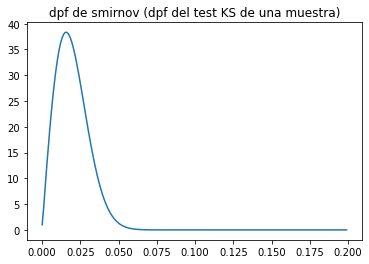

In [4]:
# Estadístico

BUn = np.max(FUn-F)
BNn = np.max(FNn-F)

#p- Value
rv = stats.ksone(n_samples) #dpf de smirnov (dpf del test KS de una muestra)

print(f'Estadístico BUn: {BUn}, p-value: {1-rv.cdf(BUn)}')
print(f'Estadístico BNn: {BNn}, p-value: {1-rv.cdf(BNn)}')

xx = np.arange(0,0.2,0.001)
plt.figure(figsize=(6,4))
plt.plot(xx, rv.pdf(xx))
plt.title('dpf de smirnov (dpf del test KS de una muestra)')
plt.show()


### Seguimos con el práctico.

In [ ]:
# algunas funciones:

from scipy.stats import kstest, shapiro

def testKSnormal(data):
    # Kolmogorov-Smirnov
    # Alta cantidad de muestras
    # se extrae media y varianza para adaptar al test.
    data_test = (data - np.mean(data))/np.std(data)

    ks = kstest(data_test, 'norm')
    print (f'KS_est: {ks.statistic} \np_value: {ks.pvalue}')
    if ks.pvalue < 0.05:
        print('Rechazada H_0: no es distrib normal (p < 0.05)')
    else:
        print('Aceptada H_0: se considera distrib normal (p > 0.05)')
    return ks

def testShapironormal(data):
    # Shapiro - Wilks
    # Baja cantidad de muestras
    # se extrae media y varianza para adaptar al test.
    data_test = (data - np.mean(data))/np.std(data)
    
    sh = shapiro(data_test)
    print (f'Shapiro_est: {sh.statistic} \np_value: {sh.pvalue}')
    if sh.pvalue < 0.05:
        print('Rechazada H0: no es distrib normal (p < 0.05)')
    else:
        print('Aceptada H0: se considera distrib normal (p > 0.05)')
    return sh

In [ ]:
print('Test de normalidad de Comercio1')
testShapironormal(data_comer1)
print('\n\n')
print('Test de normalidad de Comercio2')
testShapironormal(data_comer2)
print('')


Ninguna distribución es normal.


![](imgs/sesgo.jpg)
https://www.oreilly.com/library/view/clojure-for-data/9781784397180/ch01s13.html

Las distribuciones tiene un sesgo por oblicuidad (skewness)

Una solución puede ser transformar las variables aleatorias, de forma tal que sean normales. Se puede proponer cualquier transformación, las más comunes:
* Raíz cuadrada $T(X)=\sqrt(X)$
* Raíz cúbica $T(X) = X^{\frac{1}{3}}$
* Logarítmo $T(X) = log(x)$
* Inversa $T(x) = \frac{1}{X}$



In [ ]:
t_data_comer1 = np.log(data_comer1)
t_data_comer2 = np.log(data_comer2)

f, ax = plt.subplots(1,2, figsize=(10,4))
h = ax[0].hist(t_data_comer1,bins=20,density=True,color='#599AD3')
ax[0].set_title('Comercio 1 Transformado')
h = ax[1].hist(t_data_comer2,bins=20,density=True,color='#599AD3')
ax[1].set_title('Comercio 2 Transformado')
print('')

testShapironormal(t_data_comer1)
print('\n\n')
testShapironormal(t_data_comer2)
print('')

In [ ]:
# Transformada de la media poblacional.

t_mu = np.log(35)

### Test de Homocedasticidad.

El test de Homocedasticidad, es decir, de varianzas iguales, propone comparar las varianzas de dos poblaciones, bajo la hipótesis de que son iguales.

El estadísitico de prueba es la distribución F:

$$ F = \frac{s_1^2}{s_2^2} = \frac{n_2 - 1}{n_1 - 1} \frac{\sum_{i=1}^{n_1} x_i^2}{\sum_{j=1}^{n_2} x_j^2} $$

siendo $H_0 = \sigma_1^2 = \sigma_2^2$. Siguiendo el estadístico $F$ se acepta $H_0$ si 
$$ F \in [F_{1-\alpha/2;n_1;n_2} , F_{\alpha/2;n_1;n_2}]$$

donde $\alpha$ es el nivel de significación de rechazo.


In [ ]:
def f_test(group1, group2):
    f = (np.std(group1)/np.std(group2))**2
    n1 = len(group1)-1
    n2 = len(group2)-1
    p_value = 1-stats.f.cdf(f, n1, n2)
    print(f'f: {f}, p_value: {p_value}')
    return f, p_value

print(f'Std_data_comer1: {np.std(data_comer1)} \t Std_data_comer2: {np.std(data_comer2)} \n')
print(f'Std_t_data_comer1: {np.std(t_data_comer1)} \t Std_t_data_comer2: {np.std(t_data_comer2)} \n')

f, p_value = f_test(t_data_comer1, t_data_comer2)
if p_value > 0.05:
    print(f'H0 aceptada (varianzas iguales) sqrt(f) = {np.sqrt(f)}')
else:
    print('H0 rechazada')
    




# Test de una muestra (One-Sample t-Test).  


## Sobre las condiciones:
Las muestras transformadas con log() cumplen:
* Independencia.
* Normalidad.
* Homocedasticidad.

por lo tanto se puede trabajar con ellas empleando el estadístico t-Student.

In [ ]:
# Z-test para evaluar con N >30
def ztest_one(data,popmean=0):
    # z-test (normal) de una muestra
    z = (np.mean(data)-popmean)/(np.std(data)/np.sqrt(len(data)))
    if z<0:
        pvalue = 2*stats.norm.cdf(z)
    else:
        pvalue = 2*(1-stats.norm.cdf(z))
    return z, pvalue

## Test de una muestra para Comercio 1 (N<30)

In [ ]:
print(f'Media muestral: {np.mean(data_comer1)}  Media poblacional:{mu} \n')

print('t-test con muestras transformadas (normales).')
st = stats.ttest_1samp(a=t_data_comer1, popmean=t_mu)
print(f'Estadistico: {st.statistic} \t pvalue: {st.pvalue}')

**Entonces, no se puede rechazar que la muestra Comercio 1 sea representativa de la poblacional**

In [ ]:
print('t-test con muestras SIN transformar (No-normales).')
st = stats.ttest_1samp(a=data_comer1, popmean=mu)
print(f'Estadistico: {st.statistic} \t pvalue: {st.pvalue}')

In [ ]:
print('Z-test con muestras transformadas (normales)')
z , pvalue = ztest_one(t_data_comer1, popmean=t_mu)
print(f'Estadistico: {z} \t pvalue: {pvalue}')

Como conclusión, la muestra Comercio 1 es asimilable a la muestra poblacional. Observar que:
* t-test con muestras transformadas **acepta** la hipótesis nula, pero por poco margen. 
* t-test con muestras no normales, no se cumplen las hipótesis del método, y **acepta** $H_0$ con una confianza incorrecta.
* z-test con muestras normales, rechaza $H_0$, incorrectamente la muestra, puesto que a valores similares de sus estadísticos, la distribución normal presenta menos áreas en las colas de la distribución, si se compara con $t_{n=10}$.

![](imgs/Student_t.png)

## Test de una muestra para Comercio 2 (N>30)


In [ ]:
print(f'Media muestral: {np.mean(data_comer2)}  Media poblacional:{mu} \n')

print('t-test con muestras transformadas (normales).')
st = stats.ttest_1samp(a=t_data_comer2, popmean=t_mu)
print(f'Estadistico: {st.statistic} \t pvalue: {st.pvalue}')

In [ ]:
print('t-test con muestras SIN transformar (No-normales).')
st = stats.ttest_1samp(a=data_comer2, popmean=mu)
print(f'Estadistico: {st.statistic} \t pvalue: {st.pvalue}')

In [ ]:
print('Z-test con muestras transformadas (normales)')
z , pvalue = ztest_one(data_comer2, popmean=mu)
print(f'Estadistico: {z} \t pvalue: {pvalue}')

Se observa que todos los estadísticos muestran resultado equivalentes. Esto se debe a que al ser la cantidad de muestras $N=50$ para Comercio 2, $t_{N=50}$ se aproxima mucho a una distribución normal.

# Test de dos muestras (Two-Sample t-Test). 

Bajo este test se busca determinar si dos muestras poseen las mismas medias muestrales. Se considera que las varianzas no son conocidas, pero son similares. El análisis de Homocedasticidad muestra que cumplen tener varianzas similares. El test queda definido como:

$$ t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}\cdot {\sqrt {{\frac {1}{n_{1}}}+{\frac {1}{n_{2}}}}}}} $$

donde el $s_p$ es el desvío equivalente 

$$ s_{p}={\sqrt {\frac {\left(n_{1}-1\right)s_{X_{1}}^{2}+\left(n_{2}-1\right)s_{X_{2}}^{2}}{n_{1}+n_{2}-2}}}$$ donde $N = n_1 + n_2 -2$ son los grados de libertad del estadístico.

En relación a las muestras Comercio 1 y Comercio 2, se determino que:
* Son independientes
* La transformada es normal
* Hay homocedasticidad entre ambas muestras.

In [ ]:
print('t-test de dos muestras transformadas.')
st = stats.ttest_ind(t_data_comer1,t_data_comer2, equal_var=True)
print(f'Estadistico: {st.statistic} \t pvalue: {st.pvalue}')

In [ ]:
def ztest_two(data1, data2):
    # z-test de dos muestras, 
    # para varianzas desconocidas, pero cercanas.

    n1 = len(data1)
    n2 = len(data2)

    sp = np.sqrt( ((n1-1)*np.var(data1) + (n2-1)*np.var(data2)) / (n1+n2-2))
    nn = np.sqrt(1/len(data1)+1/len(data2))
    # z-test (normal) de una muestra
    z = (np.mean(data1)-np.mean(data2))/(sp*nn)
    if z<0:
        pvalue = 2*stats.norm.cdf(z)
    else:
        pvalue = 2*(1-stats.norm.cdf(z))
    return z, pvalue

print('Z-test de dos muestras transformadas.')
z, pvalue = ztest_two(t_data_comer1, t_data_comer2)
print(f'Estadistico: {z} \t pvalue: {pvalue}')

In [ ]:
print('Z-test de dos muestras SIN transformar (no normales).')
z, pvalue = ztest_two(data_comer1, data_comer2)
print(f'Estadistico: {z} \t pvalue: {pvalue}')

En todos los casos $p_{value} < 0.05$ y por lo tanto se rechaza la hipótesis nula, ambas muestras no poseen la misma media muestral, y por lo tanto se considera que son muestras de diferente distribución poblacional.

Es esperable, ya que se rechazó la hipótesis de que la media muestral de Comercio 2 sea igual a la media poblacional.

Hay que notar que $n1 + n2 >30$ y por lo tanto el problema se puede resolver con un z-test.

# Test de muestras pareadas (Paired-Sample t-Test). 

El testeo de datos pareados propone realizar un prueba de hipótesis de dos muestras, pertenecientes a una misma población, pero en diferentes situaciones. Por ejemplo, para un grupo de voluntarios se estudia la tasa de enfermedad, y se comparan resultados previo y posterior al suministro de un medicamento. Entonces, el tamaño de la muestra $n$ se asume igual para las dos muestras:

$$X_1 = \{x_1^1, x_1^2, x_1 ^3, \dots, x_1 ^n\} ~ y ~ X_2 = \{x_2^1, x_2^2, x_2^3, \dots, x_2 ^n\}$$ 

Siendo la muestra diferencia $d_i = \{ x_1^i - x_2^i \}$ con $i\in 1 \dots n $,  se puede definir una media muestral para la diferencia, $\bar{d} = 1/n \sum d_i$ y una varianza muestral $s^2_d = (1/(n-1))\sum (d_i - \bar{d})^2$.

El contraste de hipótesis para la diferencia de las medias muestrales se convierte en un contraste sobre el valor de la media poblacional $\mu_d = \mu_1 - \mu_2$. El problema, así definido, es equivalente al contraste de hipótesis de una muestra, quedando definido el estadístico t-Student de $n-1$ grados de libertad:

$$t =\frac{\bar{d} - \mu_d}{s_d \big /  \sqrt{n}} $$

Teniendo en cuenta que interesa determinar si las muestras pareadas son o no parte de una misma población, el test consiste, entonces, en comprobar si la diferencia entre las dos medias poblacionales es nula, $\mu_d=0$, 
$$
\begin{matrix}
 Aceptar \, \mathcal{H}_0 & si & \mu_d = 0: \mu_1=\mu_2 \\
Rechazar \, \mathcal{H}_0  & si & \mu_d \not = 0: \mu_1 \not= \mu_2
\end{matrix}
$$

y bajo la hipótesis $H_0$ el estadístico se reduce a:

$$t =\frac{\bar{d}}{s_d \big /  \sqrt{n}} $$

